<a href="https://colab.research.google.com/github/PhillipMas/PhillipMas/blob/main/Copy_of_Rolling_Window__RNN_VaR_FINAL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
pip install --upgrade yfinance

In [71]:
!!pip install arch

['Collecting arch',
 '  Downloading arch-7.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)',
 'Requirement already satisfied: numpy>=1.22.3 in /usr/local/lib/python3.10/dist-packages (from arch) (1.26.4)',
 'Requirement already satisfied: scipy>=1.8 in /usr/local/lib/python3.10/dist-packages (from arch) (1.13.1)',
 'Requirement already satisfied: pandas>=1.4 in /usr/local/lib/python3.10/dist-packages (from arch) (2.1.4)',
 'Requirement already satisfied: statsmodels>=0.12 in /usr/local/lib/python3.10/dist-packages (from arch) (0.14.2)',
 'Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.4->arch) (2.8.2)',
 'Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.4->arch) (2024.1)',
 'Requirement already satisfied: tzdata>=2022.1 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.4->arch) (2024.1)',
 'Requirement already satisfied: patsy>

In [75]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
import yfinance as yf


**FETCH DATA**

In [76]:
# Define the stock ticker, e.g., 'AAPL' for Apple
ticker = '^J203.JO'

# Step 1: Download stock data from Yahoo Finance
data = yf.download(ticker, start='2012-01-01', end='2024-01-01')

# Step 2: Calculate log returns
data['Log Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1)).dropna()
data = data.dropna()


[*********************100%***********************]  1 of 1 completed


**Pre-Porcessing**

In [78]:
# Step 3: Preprocess Data for LSTM and GRU models
window_size = 120
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the log returns
scaled_data = scaler.fit_transform(data[['Log Returns']])




In [79]:
# Create sequences for training/testing
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


In [80]:
# Create training and testing datasets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size-window_size:]

X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)


In [81]:
# Reshape for LSTM/GRU (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



**MODEL CONSTRACAO**

In [82]:
# Step 4: Build and Train LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.0696
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0064
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - loss: 0.0069
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 0.0062
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 0.0061
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - loss: 0.0057
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0058
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - loss: 0.0060
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0060
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0056


In [84]:
# Step 5: Build and Train GRU Model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(units=50))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 0.0554
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 0.0072
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 0.0064
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0070
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - loss: 0.0061
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - loss: 0.0061
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0063
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0059
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - loss: 0.0057
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - loss: 0.0052


In [85]:
# Step 6: Function to compute rolling VaR using the LSTM or GRU model
def calculate_rolling_var(model, X_test, y_test, window_size, confidence_level=0.05):
    var_estimates = []
    for i in range(window_size, len(X_test)):
        # Predict the next day's return using the model
        predicted_return = model.predict(X_test[i:i+1])[0, 0]

        # Compute VaR as the 5th percentile (95% confidence level)
        var = np.percentile(predicted_return, confidence_level * 100)
        var_estimates.append(var)

    # Convert the predictions back to their original scale
    var_estimates = np.array(var_estimates).reshape(-1, 1)
    var_estimates = scaler.inverse_transform(var_estimates)

    return var_estimates


In [86]:
# Step 7: Compute the rolling VaR for each model
lstm_var_estimates = calculate_rolling_var(lstm_model, X_test, y_test, window_size)
gru_var_estimates = calculate_rolling_var(gru_model, X_test, y_test, window_size)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

In [88]:
# Inverse scale the actual test returns
y_test_actual = scaler.inverse_transform(y_test[window_size:].reshape(-1, 1))


In [89]:
# Step 8: Identify exceedances (actual return < VaR)
lstm_exceedances = y_test_actual < lstm_var_estimates
gru_exceedances = y_test_actual < gru_var_estimates


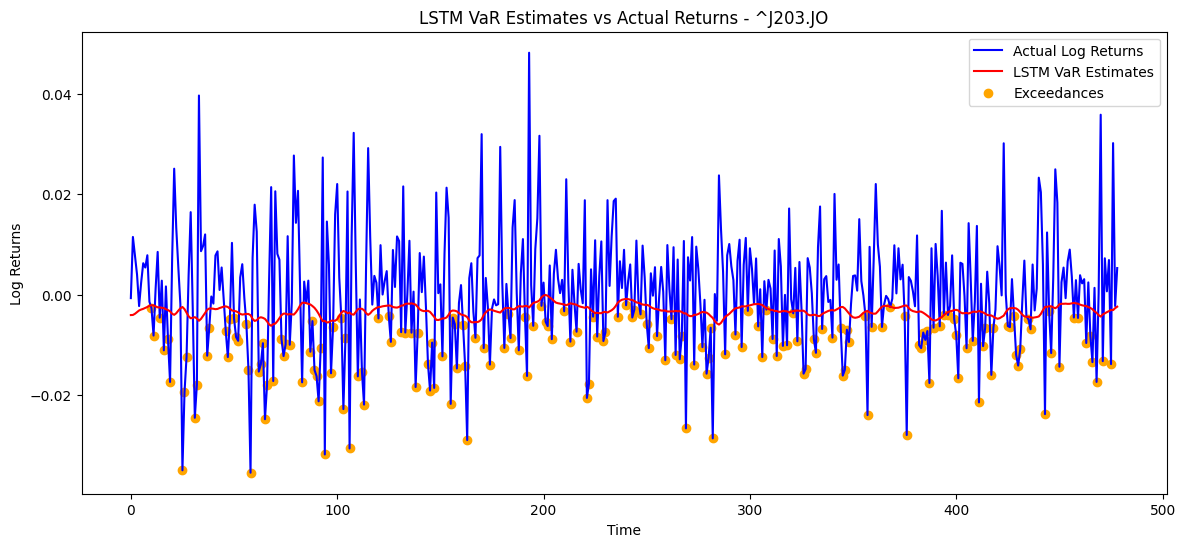

In [90]:
# Step 9: Plot VaR estimates vs returns and highlight exceedances

# Plot LSTM VaR
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, color='blue', label='Actual Log Returns')
plt.plot(lstm_var_estimates, color='red', label='LSTM VaR Estimates')
plt.scatter(np.where(lstm_exceedances)[0], y_test_actual[lstm_exceedances], color='orange', label='Exceedances')
plt.title(f'LSTM VaR Estimates vs Actual Returns - {ticker}')
plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.legend()
plt.show()


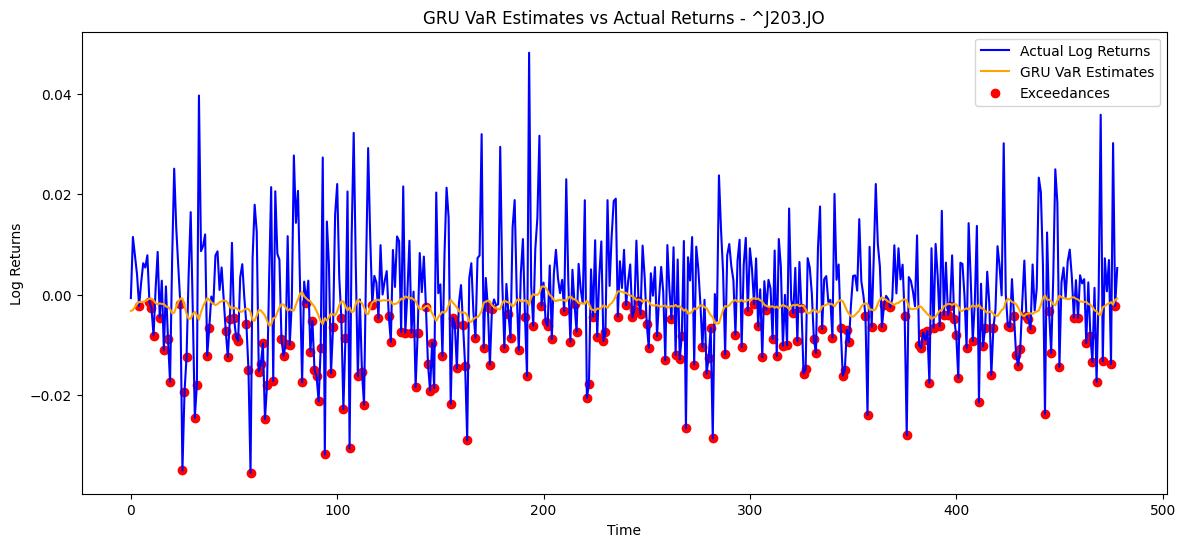

In [91]:
# Plot GRU VaR
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, color='blue', label='Actual Log Returns')
plt.plot(gru_var_estimates, color='orange', label='GRU VaR Estimates')
plt.scatter(np.where(gru_exceedances)[0], y_test_actual[gru_exceedances], color='red', label='Exceedances')
plt.title(f'GRU VaR Estimates vs Actual Returns - {ticker}')
plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.legend()
plt.show()
